# Housing Prices

In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from termcolor import colored
import warnings

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

warnings.filterwarnings("ignore")




2023-07-07 16:45:41.723140: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Descriptive Analysis

In [2]:
# Importing The Dataset

path = os.path.join("Resources", "Housing.csv")
df = pd.read_csv(path)

# Descriptive Analysis

data_points = df.count()
null_values = df.isnull().sum()
data_type = df.dtypes

print(f"{null_values}/n/n{data_points}/n/n{data_type}")



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64/n/nprice               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64/n/nprice                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


# Analyzing the price

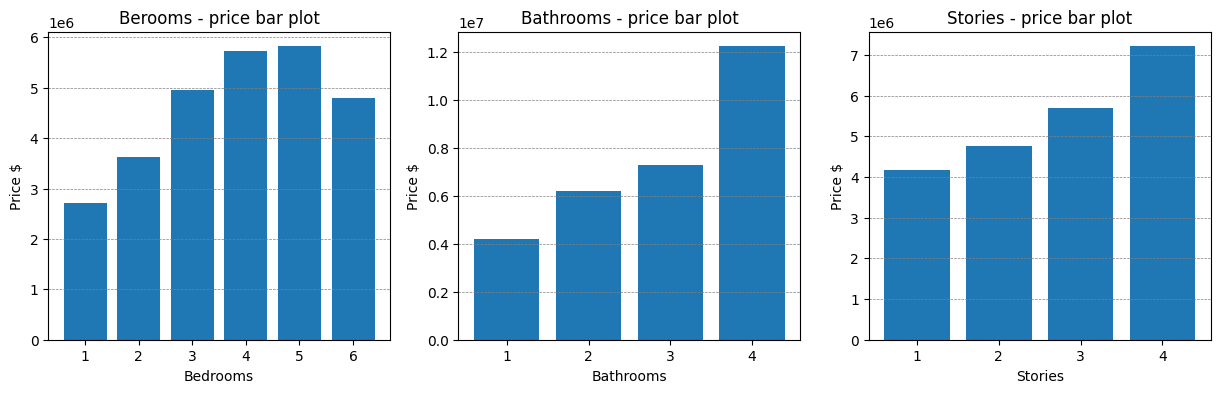

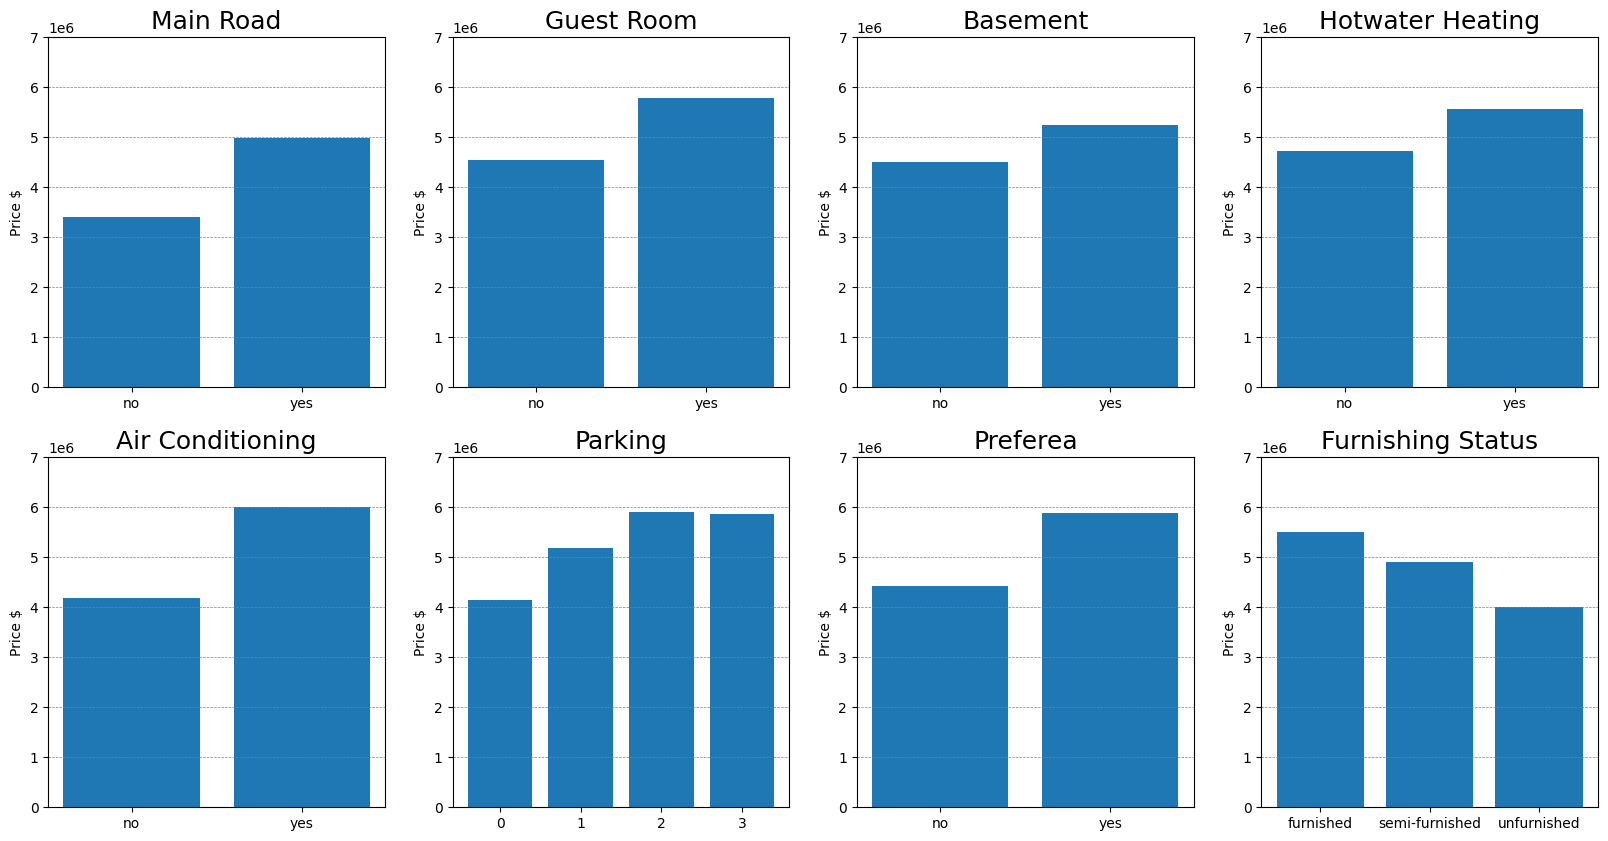

In [3]:

df_by_bedrooms = df.groupby(["bedrooms"])["price"].mean()
df_by_bedrooms = df_by_bedrooms.sort_values()

df_by_bathrooms = df.groupby(["bathrooms"])["price"].mean()
df_by_bathrooms = df_by_bathrooms.sort_values()

df_by_stories = df.groupby(["stories"])["price"].mean()
df_by_stories = df_by_stories.sort_values()

fig, axes = plt.subplots(1,3, figsize = (15,4))
axes[0].bar(df_by_bedrooms.index,df_by_bedrooms)
axes[0].set_title("Berooms - price bar plot", fontsize = 12)
axes[0].set_xlabel("Bedrooms", fontsize = 10)
axes[0].set_ylabel("Price $", fontsize = 10)
axes[0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

axes[1].bar(df_by_bathrooms.index,df_by_bathrooms)
axes[1].set_title("Bathrooms - price bar plot", fontsize = 12)
axes[1].set_xlabel("Bathrooms", fontsize = 10)
axes[1].set_ylabel("Price $", fontsize = 10)
axes[1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

axes[2].bar(df_by_stories.index,df_by_stories)
axes[2].set_title("Stories - price bar plot", fontsize = 12)
axes[2].set_xlabel("Stories", fontsize = 10)
axes[2].set_ylabel("Price $", fontsize = 10)
axes[2].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()


main_road_df = df.groupby(["mainroad"])["price"].mean()
guestroom_df = df.groupby(["guestroom"])["price"].mean()
basement_df = df.groupby(["basement"])["price"].mean()
hotwaterheating_df = df.groupby(["hotwaterheating"])["price"].mean()
airconditioning_df = df.groupby(["airconditioning"])["price"].mean()
parking_df = df.groupby(["parking"])["price"].mean()
prefarea_df = df.groupby(["prefarea"])["price"].mean()
furnishingstatus_df = df.groupby(["furnishingstatus"])["price"].mean()


fig, axes = plt.subplots(2,4, figsize = (20,10))
axes[0,0].bar(main_road_df.index, main_road_df)
axes[0,0].set_title("Main Road", fontsize = 18)
axes[0,0].set_ylabel("Price $")
axes[0,0].set_ylim([0,7000000])

axes[0,1].bar(guestroom_df.index, guestroom_df)
axes[0,1].set_title("Guest Room", fontsize = 18)
axes[0,1].set_ylabel("Price $")
axes[0,1].set_ylim([0,7000000])

axes[0,2].bar(basement_df.index, basement_df)
axes[0,2].set_title("Basement", fontsize = 18)
axes[0,2].set_ylabel("Price $")
axes[0,2].set_ylim([0,7000000])

axes[0,3].bar(hotwaterheating_df.index, hotwaterheating_df)
axes[0,3].set_title("Hotwater Heating", fontsize = 18)
axes[0,3].set_ylabel("Price $")
axes[0,3].set_ylim([0,7000000])

axes[1,0].bar(airconditioning_df.index, airconditioning_df)
axes[1,0].set_title("Air Conditioning", fontsize = 18)
axes[1,0].set_ylabel("Price $")
axes[1,0].set_ylim([0,7000000])

axes[1,1].bar(parking_df.index, parking_df)
axes[1,1].set_title("Parking", fontsize = 18)
axes[1,1].set_ylabel("Price $")
axes[1,1].set_ylim([0,7000000])

axes[1,2].bar(prefarea_df.index, prefarea_df)
axes[1,2].set_title("Preferea", fontsize = 18)
axes[1,2].set_ylabel("Price $")
axes[1,2].set_ylim([0,7000000])

axes[1,3].bar(furnishingstatus_df.index, furnishingstatus_df)
axes[1,3].set_title("Furnishing Status", fontsize = 18)
axes[1,3].set_ylabel("Price $")
axes[1,3].set_ylim([0,7000000])

for i in range(4):
    for j in range(2):
        axes[j,i].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.show()

# Linear Regression (+ Diagnosis)

In [16]:
# Preparing the data
x = df["area"]
x = x.values
x = np.expand_dims(x, axis = 1)

y = df["price"]
y = y.values
y = np.expand_dims(y, axis =1)

# Splitting the data into sets
x_train, x_, y_train, y_ = train_test_split(x, y, test_size = 0.4, random_state = 1)
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size = 0.5, random_state = 1)



In [30]:
# Looping

max_degree = 15

train_mses = []
cv_mses = []
models = []
scalers = []

for degree in range(1,max_degree):
    # Adding polynomial features for the training set
    poly = PolynomialFeatures(degree, include_bias = False)
    x_train_mapped = poly.fit_transform(x_train)
    
    # Scaling the training set
    scaler = StandardScaler()
    x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
    scalers.append(scaler)
    
    # Creating and training the model
    model = LinearRegression()
    model.fit(x_train_mapped_scaled, y_train)
    models.append(model)
    
    # prediction
    yhat = model.predict(x_train_mapped_scaled)
    train_mse = mean_squared_error(yhat, y_train)/2
    train_mses.append(train_mse)

    # Adding polynomial features and scaling the cv set
    poly = PolynomialFeatures(degree, include_bias = False)
    x_cv_mapped = poly.fit_transform(x_cv)
    x_cv_mapped_scaled = scaler.transform(x_cv_mapped)
    
    # Getting the mean squared error for the cv set
    yhat = model.predict(x_cv_mapped_scaled)
    cv_mse = mean_squared_error(yhat, y_cv)/2
    cv_mses.append(cv_mse)
    
# Choosing the best model and publishing the Generalized error
best_model = models[np.argmin(cv_mses)]
degree = np.argmin(cv_mses) + 1
poly = PolynomialFeatures(degree, include_bias = False)
x_test_mapped = poly.fit_transform(x_test)
x_test_mapped_scaled = scalers[np.argmin(cv_mses)].transform(x_test_mapped)
yhat = best_model.predict(x_test_mapped_scaled)
test_mse = mean_squared_error(yhat, y_test)/2
print(f"The generalized error is: " + colored(f"{test_mse}", on_color = 'on_yellow'))
print(f"Best model: " + colored(f"{degree}", on_color = 'on_yellow'))
chosen_degree = degree

# plotting all the models
df1 = pd.DataFrame()
degrees = list(range(1,max_degree))

model_names = []
for degree in degrees:
    model_names.append(f"model {degree}")

for degree in degrees:
    poly = PolynomialFeatures(degree, include_bias = False)
    x_mapped = poly.fit_transform(x)
    x_mapped_scaled = scalers[degree - 1].transform(x_mapped)
    yhat = models[degree - 1].predict(x_mapped_scaled)
    df1[f"model {degree}"] = yhat.flatten()
    
df1["area"] = df["area"]
df1 = df1.sort_values("area")
df1 = df1.reset_index(drop = True)

df1

The generalized error is: 1437149219575.0786
Best model: 7


,model 1,model 2,model 3,model 4,model 5,model 6,model 7,model 8,model 9,model 10,model 11,model 12,model 13,model 14,area
0,3.217132e+06,2.503219e+06,2.053886e+06,2.988068e+06,3.264092e+06,3.423460e+06,2.513907e+06,2.463209e+06,2.219657e+06,2.489504e+06,1.257292e+06,1.796265e+06,7.095565e+05,1.999441e+06,1650
1,3.238139e+06,2.543228e+06,2.112780e+06,2.990905e+06,3.242898e+06,3.382992e+06,2.614454e+06,2.573538e+06,2.387162e+06,2.581274e+06,1.767286e+06,2.089105e+06,1.520864e+06,2.097809e+06,1700
2,3.295278e+06,2.651131e+06,2.270101e+06,3.005189e+06,3.197999e+06,3.292507e+06,2.844184e+06,2.824469e+06,2.755304e+06,2.804478e+06,2.719110e+06,2.699685e+06,2.853054e+06,2.559327e+06,1836
3,3.324267e+06,2.705362e+06,2.348328e+06,3.015960e+06,3.182019e+06,3.256924e+06,2.939288e+06,2.927702e+06,2.900073e+06,2.902984e+06,3.015485e+06,2.921201e+06,3.188337e+06,2.814736e+06,1905
4,3.343174e+06,2.740543e+06,2.398773e+06,3.024212e+06,3.173948e+06,3.237247e+06,2.994532e+06,2.987423e+06,2.981490e+06,2.962004e+06,3.158053e+06,3.038913e+06,3.324625e+06,2.969622e+06,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,7.962157e+06,6.921870e+06,6.741081e+06,5.730662e+06,6.016332e+06,5.954279e+06,6.309675e+06,6.279497e+06,6.357474e+06,6.372155e+06,6.136439e+06,5.920204e+06,5.437206e+06,4.897985e+06,12944
541,8.069712e+06,6.914491e+06,6.786515e+06,5.759812e+06,6.098407e+06,5.988121e+06,6.187680e+06,6.150076e+06,6.313176e+06,6.468786e+06,7.342859e+06,7.801715e+06,8.566666e+06,9.243971e+06,13200
542,8.069712e+06,6.914491e+06,6.786515e+06,5.759812e+06,6.098407e+06,5.988121e+06,6.187680e+06,6.150076e+06,6.313176e+06,6.468786e+06,7.342859e+06,7.801715e+06,8.566666e+06,9.243971e+06,13200
543,9.078040e+06,6.613482e+06,7.446953e+06,7.865200e+06,8.030344e+06,7.789773e+06,6.129606e+06,6.184785e+06,6.085054e+06,6.047236e+06,5.977710e+06,5.962523e+06,5.950156e+06,5.944574e+06,15600


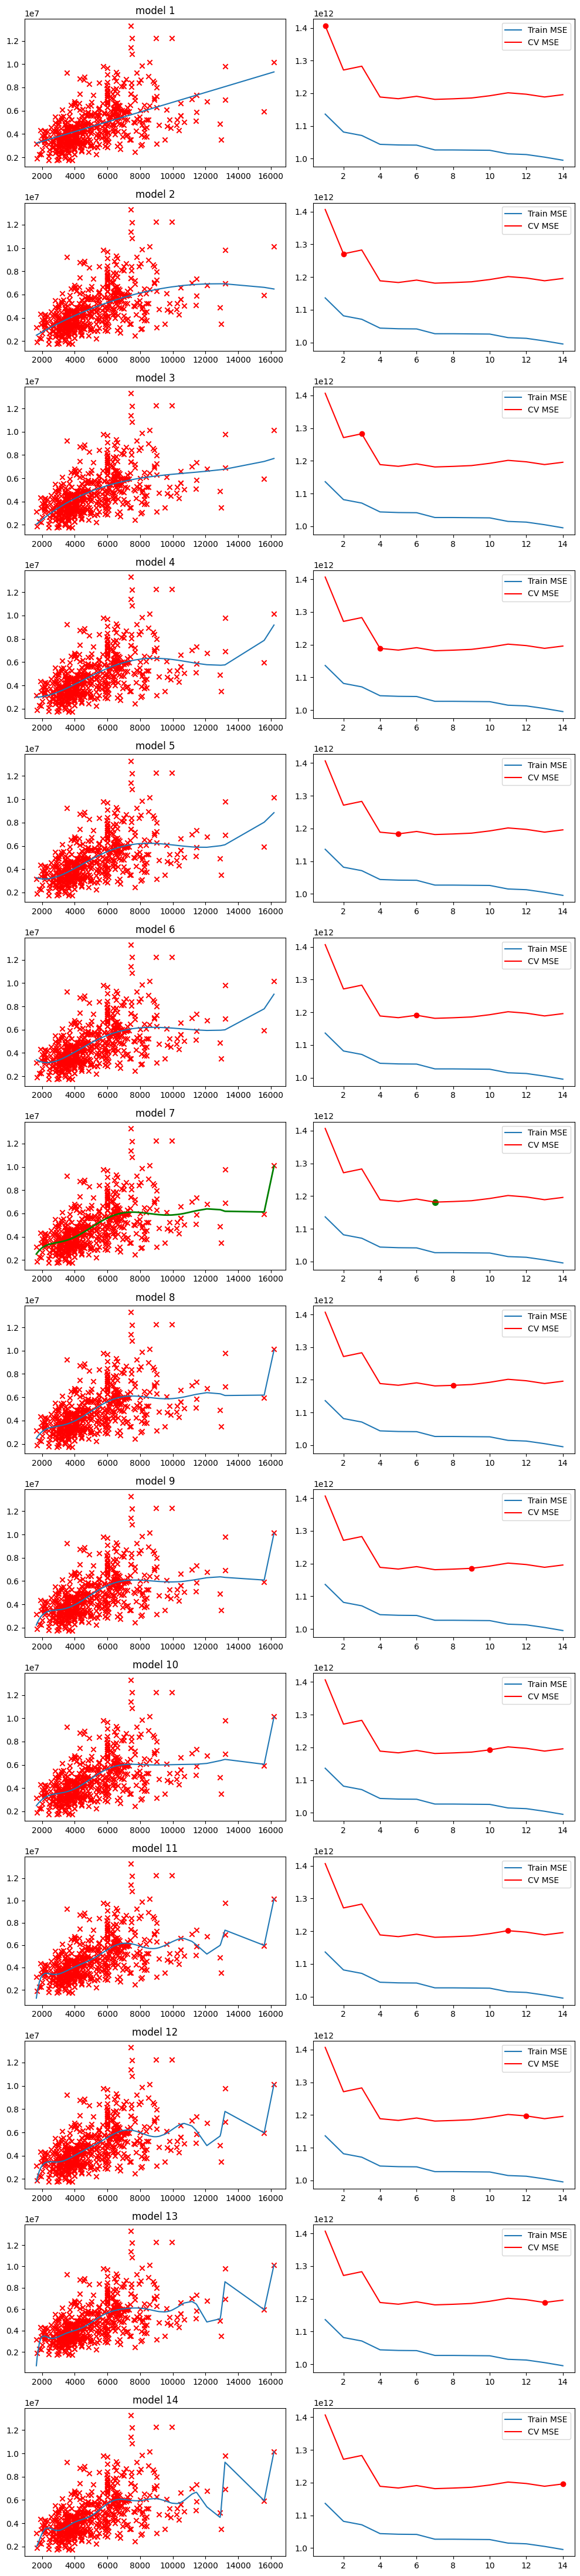

In [48]:
fig, axes = plt.subplots(max_degree - 1, 2, figsize = (10, 3 * max_degree - 1))


for i in range(0,max_degree-1):
    axes[i, 0].scatter(x = x[:,0] , y = y.flatten(), marker = 'x', c = 'r')
    if i+1 != chosen_degree:
        axes[i,0].plot(df1["area"] , df1[f"model {i+1}"])
    else:
        axes[i,0].plot(df1["area"] , df1[f"model {i+1}"], c = 'g', linewidth = 2)
    axes[i,0].set_title(f"model {i + 1}")
    
    axes[i,1].plot(degrees, train_mses, label = 'Train MSE')
    axes[i,1].plot(degrees, cv_mses, label = 'CV MSE', c = 'r')
    if i+1 != chosen_degree:
        axes[i,1].scatter(i + 1, cv_mses[i], c = 'r')
    else:
        axes[i,1].scatter(i + 1, cv_mses[i], s = 50, c = 'green')
    axes[i,1].legend()
        
plt.tight_layout()
plt.show()